In [1]:
2*2

4

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h2>Import libraries</h2>

In [28]:
import numpy as np 
import pandas as pd
# import matplotlib.pyplot as plt
# import xgboost
# import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

<h2>Load data</h2>

In [4]:
covid_data = pd.read_csv("./dataset/Covid Dataset.csv")

<h2>Review data</h2>

In [5]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [6]:
covid_data.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [7]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [8]:
# As we can see there are only categorical data
# We should check for some N/A and null cells
covid_data.isna().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [9]:
covid_data.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [10]:
# it would be helpful to know if dataset was balanced 
number_covid_positives = len(covid_data[covid_data['COVID-19'] == 'Yes']['COVID-19'])
number_covid_negatives = len(covid_data[covid_data['COVID-19'] == 'No']['COVID-19'])

print("Number of COVID-19 positives\n", number_covid_positives)
print("Number of COVID-19 negatives\n", number_covid_negatives)


Number of COVID-19 positives
 4383
Number of COVID-19 negatives
 1051


<AxesSubplot:xlabel='COVID-19', ylabel='count'>

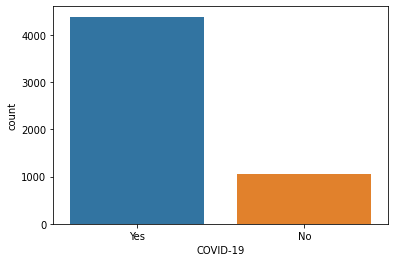

In [10]:
# There are 3X more positive cases than negative ones. 
sns.countplot(x='COVID-19', data=covid_data)

In [11]:
# Before go further let's check available features
for col in covid_data.columns:
    print("Number of unique values for column", col,':', covid_data[col].nunique())

Number of unique values for column Breathing Problem : 2
Number of unique values for column Fever : 2
Number of unique values for column Dry Cough : 2
Number of unique values for column Sore throat : 2
Number of unique values for column Running Nose : 2
Number of unique values for column Asthma : 2
Number of unique values for column Chronic Lung Disease : 2
Number of unique values for column Headache : 2
Number of unique values for column Heart Disease : 2
Number of unique values for column Diabetes : 2
Number of unique values for column Hyper Tension : 2
Number of unique values for column Fatigue  : 2
Number of unique values for column Gastrointestinal  : 2
Number of unique values for column Abroad travel : 2
Number of unique values for column Contact with COVID Patient : 2
Number of unique values for column Attended Large Gathering : 2
Number of unique values for column Visited Public Exposed Places : 2
Number of unique values for column Family working in Public Exposed Places : 2
Nu

In [12]:
# It is evident that columns Wearing Masks and Sanitization from Market can be safely excluded from dataset (only one possible value)
_ = covid_data.pop('Wearing Masks')
_ = covid_data.pop('Sanitization from Market')

In [13]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes


In [14]:
# creates label and feature sets
le = LabelEncoder()
y_train = covid_data.pop('COVID-19')
y_train = le.fit_transform(y_train)

for col in covid_data.columns:
    covid_data[col] = le.fit_transform(covid_data[col])
    
x_train = covid_data

In [22]:
x_train.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0


In [33]:
x_train.iloc[0]

Breathing Problem                          1
Fever                                      1
Dry Cough                                  1
Sore throat                                1
Running Nose                               1
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   1
Hyper Tension                              1
Fatigue                                    1
Gastrointestinal                           1
Abroad travel                              0
Contact with COVID Patient                 1
Attended Large Gathering                   0
Visited Public Exposed Places              1
Family working in Public Exposed Places    1
Name: 0, dtype: int32

In [35]:
y_train[0]

1

In [23]:
x_train.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places'],
      dtype='object')

In [15]:
# check sets dimensions
print("Label set dimensions: ", y_train.shape)
print("Features set dimensions: ", x_train.shape)

Label set dimensions:  (5434,)
Features set dimensions:  (5434, 18)


<h2>Bulding neural network using tensorflow</h2>

In [16]:
# Before the building we use SMOTE to balance dataset

sm = SMOTE()

x_bal, y_bal = sm.fit_resample(x_train, y_train)

In [17]:
# creates training and test/validation sets
part_x_bal, x_test, part_y_bal, y_test = train_test_split(x_bal, y_bal, test_size=0.2, random_state=1)

In [18]:
# build the model
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(x_bal.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bal = model.fit(part_x_bal, part_y_bal, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
14/14 [==============================] - 1s 34ms/step - loss: 0.5885 - accuracy: 0.6818 - val_loss: 0.5013 - val_accuracy: 0.8683
Epoch 2/50
14/14 [==============================] - 0s 12ms/step - loss: 0.4267 - accuracy: 0.8987 - val_loss: 0.3433 - val_accuracy: 0.9094
Epoch 3/50
14/14 [==============================] - 0s 15ms/step - loss: 0.2896 - accuracy: 0.9283 - val_loss: 0.2296 - val_accuracy: 0.9361
Epoch 4/50
14/14 [==============================] - 0s 16ms/step - loss: 0.2005 - accuracy: 0.9370 - val_loss: 0.1650 - val_accuracy: 0.9470
Epoch 5/50
14/14 [==============================] - 0s 22ms/step - loss: 0.1509 - accuracy: 0.9539 - val_loss: 0.1289 - val_accuracy: 0.9550
Epoch 6/50
14/14 [==============================] - 0s 35ms/step - loss: 0.1207 - accuracy: 0.9619 - val_loss: 0.1076 - val_accuracy: 0.9686
Epoch 7/50
14/14 [==============================] - 0s 21ms/step - loss: 0.1032 - accuracy: 0.9659 - val_loss: 0.0944 - val_accuracy: 0.9624
Epoch 8/50
14

# Save model


In [24]:
# export the model
model.save('model.h5')



In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_loaded = tf.keras.models.load_model("model.h5")

In [30]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [26]:
print("Model input tensor:", model.input)
print("Model input name(s):", model.input_names)

Model input tensor: KerasTensor(type_spec=TensorSpec(shape=(None, 18), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")
Model input name(s): ['dense_input']


In [27]:
history_dict = history_bal.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

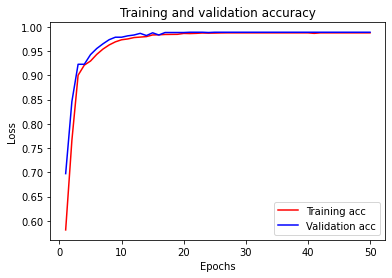

In [20]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h2>Extreme Gradient Boosting</h2>

In [21]:
xgb = xgboost.XGBClassifier()
xgb.fit(x_bal, y_bal)
y_pred = xgb.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9891676168757126


In [22]:
# tuning the parameters
estimator = xgboost.XGBClassifier(
    objective= 'binary:logistic',
    nthread=1,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 120, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 10,
    verbose=3
)
grid_search.fit(x_bal, y_bal)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV 2/10] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=1.000 total time=   0.5s
[CV 6/10] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.982 total time=   0.5s
[CV 1/10] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=1.000 total time=   0.8s
[CV 5/10] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.996 total time=   0.8s
[CV 9/10] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=1.000 total time=   0.8s
[CV 3/10] END learning_rate=0.1, max_depth=3, n_estimators=60;, score=1.000 total time=   0.6s
[CV 7/10] END learning_rate=0.1, max_depth=3, n_estimators=60;, score=0.977 total time=   0.6s
[CV 1/10] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 total time=   1.0s
[CV 5/10] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.999 total time=   1.0s
[CV 9/10] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=1.000 

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [23]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, ...)

In [24]:
grid_search.best_score_

0.9960105357290345